In [2]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 123kB/s 
     |████████████████████████████████| 3.8MB 50.6MB/s 
     |████████████████████████████████| 450kB 55.5MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [3]:
import os
import nltk
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from matplotlib import pyplot as plt
import json
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import csv
import zipfile

Using TensorFlow backend.


In [4]:
tf.__version__

'2.0.0'

In [0]:
# !wget https://storage.googleapis.com/columbia_landmarks/glove_50.zip  \
#     -O /tmp/RawData.zip

In [0]:
# local_zip = '/tmp/RawData.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp')
# zip_ref.close()

In [7]:
from google.colab import files
uploaded = files.upload()

Saving glove.twitter.27B.50d.txt.zip to glove.twitter.27B.50d.txt.zip


In [27]:
!ls -al

total 212288
drwxr-xr-x 1 root root      4096 Mar  1 15:08 .
drwxr-xr-x 1 root root      4096 Mar  1 14:27 ..
-rw-r--r-- 1 root root   1509129 Mar  1 15:08 articles_test.csv
-rw-r--r-- 1 root root   6523814 Mar  1 15:08 articles_train.csv
drwxr-xr-x 1 root root      4096 Feb 19 17:12 .config
-rw-r--r-- 1 root root 209323095 Mar  1 14:55 glove.twitter.27B.50d.txt.zip
drwxr-xr-x 1 root root      4096 Feb  5 18:37 sample_data


In [0]:
local_zip = 'glove.twitter.27B.50d.txt.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [29]:
embeddings_index = {}
f = open('/tmp/glove.twitter.27B.50d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 1193514 word vectors.


In [11]:
!wget https://raw.githubusercontent.com/harish-cu/tweet-url-relationships/master/data/temp/sampling_blind/latest/articles_train.csv
!wget https://raw.githubusercontent.com/harish-cu/tweet-url-relationships/master/data/temp/sampling_blind/latest/articles_test.csv

--2020-03-01 15:08:28--  https://raw.githubusercontent.com/harish-cu/tweet-url-relationships/master/data/temp/sampling_blind/latest/articles_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6523814 (6.2M) [text/plain]
Saving to: ‘articles_train.csv’

articles_train.csv  100%[===================>]   6.22M  --.-KB/s    in 0.02s   

2020-03-01 15:08:29 (267 MB/s) - ‘articles_train.csv’ saved [6523814/6523814]

--2020-03-01 15:08:30--  https://raw.githubusercontent.com/harish-cu/tweet-url-relationships/master/data/temp/sampling_blind/latest/articles_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:4

In [181]:
!ls -al

total 212288
drwxr-xr-x 1 root root      4096 Mar  1 15:08 .
drwxr-xr-x 1 root root      4096 Mar  1 14:27 ..
-rw-r--r-- 1 root root   1509129 Mar  1 15:08 articles_test.csv
-rw-r--r-- 1 root root   6523814 Mar  1 15:08 articles_train.csv
drwxr-xr-x 1 root root      4096 Feb 19 17:12 .config
-rw-r--r-- 1 root root 209323095 Mar  1 14:55 glove.twitter.27B.50d.txt.zip
drwxr-xr-x 1 root root      4096 Feb  5 18:37 sample_data


In [0]:
df_train = pd.read_csv('articles_train.csv')
df_test = pd.read_csv('articles_test.csv')

In [0]:
text = df_train['content_body_clean']

In [184]:
type(text)

pandas.core.series.Series

In [0]:
t = Tokenizer()
t.fit_on_texts(text)

sequence_length = 500


train = t.texts_to_sequences(text)
num_words = len(t.word_index)+1
max_features = num_words
x_train = pad_sequences(train, maxlen=sequence_length, padding='post')
y_train = np.array(df_train['blind_mean_rating']/5)

In [186]:
len(train)
# !wc -l articles_train.csv
# tokenized[0]


# i = len(train[0])
# for j in range(len(train)):
#   if len(train[j]) > i:
#     i = len(train[j])
#     print(i)

i = len(x_train[0])
for j in range(len(x_train)):
  if len(x_train[j]) > i:
    i = len(x_train[j])
print(i)


500


In [0]:
# y_train = np.array(df_train['blind_mean_rating']/5)
y_train = np.array(df_train['blind_mean_rating'])

In [188]:
y_train[0]

3.1777777777777776

In [189]:
word_index = t.word_index
print('Found %s unique tokens.' % len(word_index))

Found 38128 unique tokens.


In [190]:
type(x_train)

numpy.ndarray

In [191]:
print(num_words)

embedding_dim = 50

# first create a matrix of zeros, this is our embedding matrix
embedding_matrix = np.zeros((num_words, embedding_dim))

# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_index.items():
    if i > max_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # we found the word - add that words vector to the matrix
        embedding_matrix[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        embedding_matrix[i] = np.random.randn(embedding_dim)

38129


In [0]:
df = pd.DataFrame(df_train['content_source_desc'])

In [193]:
df.head()

,content_source_desc
0,The New York Times
1,Fox News
2,The New York Times
3,Fox News
4,Breitbart


In [0]:
df_train_ohe = pd.get_dummies(df,prefix=['country_source_desc'])

In [0]:
# df_train_ohe['ohe'] = df['content_source_desc'].str.get_dummies().values.tolist()

In [0]:
# df_train_ohe.head()

In [0]:
train_aux_data = np.array(df_train_ohe)
train_aux_data = train_aux_data.astype(float)

In [0]:
# train_aux_data.shape

In [0]:
# train_aux_data

In [0]:
# train_aux_data.reshape(train_aux_data.shape[0])

In [0]:
# train_aux_data.shape

In [0]:
from keras.initializers import Constant

In [229]:
# define two sets of inputs
lstm_in = tf.keras.layers.Input(shape=(sequence_length,))

lstm_emb = tf.keras.layers.Embedding(num_words,
                    embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=sequence_length,
                    trainable=True)(lstm_in)
# lstm_out = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)) (lstm_emb)
lstm_out = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(lstm_emb)

auxiliary_input = tf.keras.layers.Input(shape=(7,), name='aux_input')

x = tf.keras.layers.concatenate([lstm_out, auxiliary_input])
x = tf.keras.layers.Dense(64, activation='relu')(x)
# x = tf.keras.layers.Dropout(0.2)(x)
# x = tf.keras.layers.Dense(64, activation='relu')(x)
pred = tf.keras.layers.Dense(1, activation="linear")(x)

model = tf.keras.models.Model(inputs=[lstm_in, auxiliary_input], outputs=pred)

model.compile(optimizer='adam',
              loss='mse')


model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 500, 50)      1906450     input_8[0][0]                    
__________________________________________________________________________________________________
bidirectional_9 (Bidirectional) (None, 128)          58880       embedding_7[0][0]                
__________________________________________________________________________________________________
aux_input (InputLayer)          [(None, 7)]          0                                            
____________________________________________________________________________________________

In [230]:
history = model.fit([x_train, train_aux_data], y_train, epochs=60)

Train on 1301 samples
Epoch 1/60
1301/1301 [==============================] - 23s 18ms/sample - loss: 1.9599
Epoch 2/60
1301/1301 [==============================] - 19s 14ms/sample - loss: 0.7181
Epoch 3/60
1301/1301 [==============================] - 19s 14ms/sample - loss: 0.6435
Epoch 4/60
1301/1301 [==============================] - 20s 15ms/sample - loss: 0.5892
Epoch 5/60
1301/1301 [==============================] - 20s 15ms/sample - loss: 0.5341
Epoch 6/60
1301/1301 [==============================] - 19s 15ms/sample - loss: 0.4597
Epoch 7/60
1301/1301 [==============================] - 20s 15ms/sample - loss: 0.3775
Epoch 8/60
1301/1301 [==============================] - 20s 15ms/sample - loss: 0.2982
Epoch 9/60
1301/1301 [==============================] - 19s 15ms/sample - loss: 0.2220
Epoch 10/60
1301/1301 [==============================] - 20s 16ms/sample - loss: 0.1353
Epoch 11/60
1301/1301 [==============================] - 20s 15ms/sample - loss: 0.0894
Epoch 12/60
1301/13

In [0]:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Embedding(num_words,
#                     embedding_dim,
#                     embeddings_initializer=Constant(embedding_matrix),
#                     input_length=sequence_length,
#                     trainable=True))
# # model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
# model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# model.compile('adam', loss='mse')
# model.summary()

# # model.add(Dropout(0.25))
# # model.add(Dense(units=5, activation='softmax'))
# # model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
# # print(model.summary())
# # model = Sequential()
# # model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1)))
# # model.add(TimeDistributed(Dense(1, activation='sigmoid')))
# # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# # # train LSTM

In [0]:
# history = model.fit(x_train, y_train, epochs=200, validation_split=0.2)

In [0]:
test = t.texts_to_sequences(df_test['content_body_clean'])
x_test = pad_sequences(test, maxlen=sequence_length, padding='post')
y_test = np.array(df_test['blind_mean_rating'])

In [0]:
df_tst = pd.DataFrame(df_test['content_source_desc'])
df_test_ohe = pd.get_dummies(df_tst,prefix=['country_source_desc'])
test_aux_data = np.array(df_test_ohe)
test_aux_data = test_aux_data.astype(np.float)

In [235]:
df_test_ohe.head()

,country_source_desc_100 Percent Fed Up,country_source_desc_Associated Press News,country_source_desc_Breitbart,country_source_desc_Fox News,country_source_desc_Media Matters,country_source_desc_The New York Times,country_source_desc_Vox
0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [236]:
df_train_ohe.head()

,country_source_desc_100 Percent Fed Up,country_source_desc_Associated Press News,country_source_desc_Breitbart,country_source_desc_Fox News,country_source_desc_Media Matters,country_source_desc_The New York Times,country_source_desc_Vox
0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0


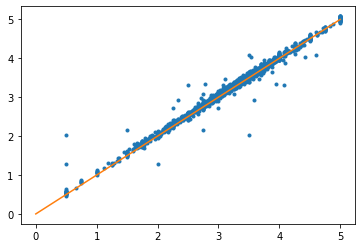

In [237]:
y_pred = model.predict([x_train, train_aux_data])

plt.plot(y_train, y_pred, '.')

# # plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 5)
y = x
plt.plot(x, y)
plt.show()

In [238]:
y_pred = y_pred.reshape(y_pred.shape[0])
d = y_train - y_pred
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(np.sum(d**2)/np.sum((y-np.mean(y))**2))

print("RESULTS...")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

RESULTS...
MAE: 0.06470820222760318
MSE: 0.012812786594251236
RMSE: 0.11319358018125955
R-Squared: 0.8462489726876382


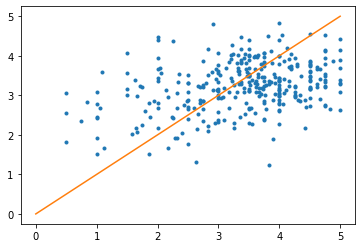

In [239]:
## Test Data Prediction
y_pred = model.predict([x_test, test_aux_data])

plt.plot(y_test, y_pred, '.')

# # plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 5)
y = x
plt.plot(x, y)
plt.show()

In [240]:
y_pred = y_pred.reshape(y_pred.shape[0])
d = y_test - y_pred
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(np.sum(d**2)/np.sum((y-np.mean(y))**2))
print("RESULTS...")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

RESULTS...
MAE: 0.7907336074945279
MSE: 0.9605620632652275
RMSE: 0.9800826818514995
R-Squared: -1.8882858162068223
